# Assignment 2 - Data Visualization
## João Victor Palhares Barbosa - 173664
###### For this assignment, I will be using data from the University of Bologna, AMSActa, which the dataset is in: http://amsacta.unibo.it/6706/


In [1]:
# Import libraries
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import os

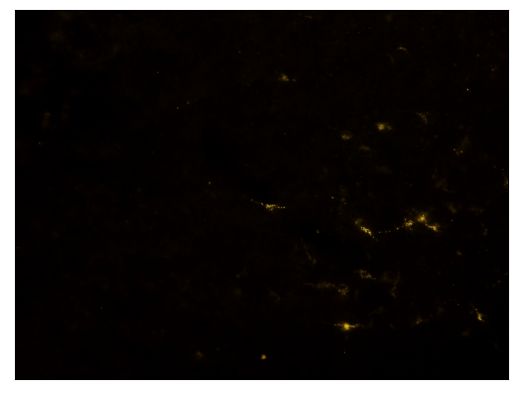

In [2]:
# Import an initial image to test, and let's count the neurons
first_image = 'fluocells/all_images/images/Mar26bS1C2R3_VLPAGr_200x_y.png'

img_Mar22bS1C3R2_DMl_200x_y = cv2.imread(first_image, 1)
img_first_image_read = cv2.cvtColor(img_Mar22bS1C3R2_DMl_200x_y, cv2.COLOR_BGR2RGB)

plt.imshow(img_first_image_read)
plt.xticks([]), plt.yticks([])
plt.show()


In [3]:
# How we're gonna n times the same sequential code, we need to create a function

def image_plotter(image):
    plt.imshow(image)
    plt.xticks([]), plt.yticks([])
    plt.show()


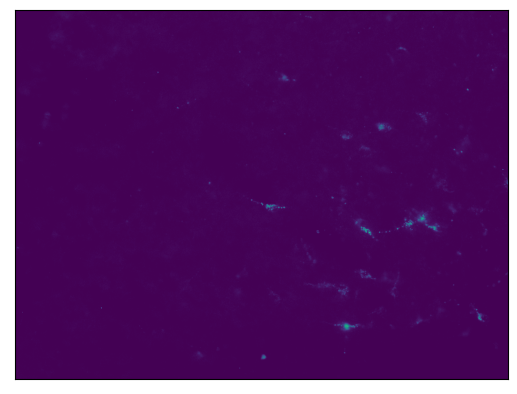

In [4]:
# Let's transform to grayscale, to detect the borders
image_gray_scale_Mar22bS1C3R2_DMl_200x_y = cv2.cvtColor(img_first_image_read, cv2.COLOR_BGR2GRAY)

image_plotter(image_gray_scale_Mar22bS1C3R2_DMl_200x_y)

Text(0, 0.5, 'Numbers of Pixels')

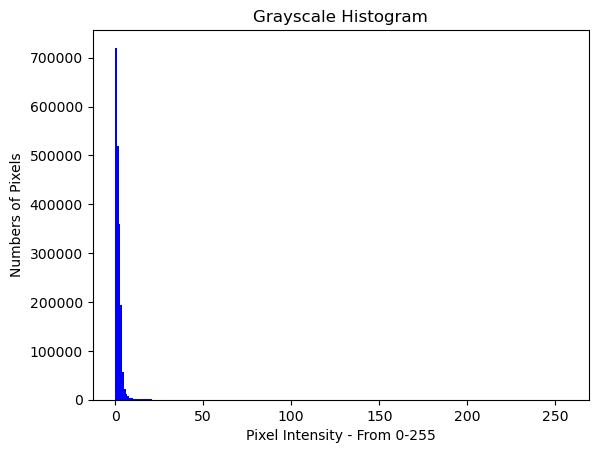

In [5]:
# Let's create a grayscale histogram
plt.figure()
plt.hist(image_gray_scale_Mar22bS1C3R2_DMl_200x_y.ravel(), 256, [0, 256], color='blue')
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity - From 0-255")
plt.ylabel("Numbers of Pixels")

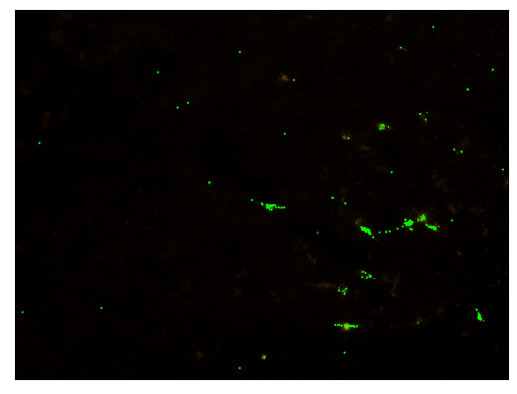

In [6]:
# Let's find the contours

border = cv2.Canny(image_gray_scale_Mar22bS1C3R2_DMl_200x_y, 200, 200)
contour, hierarchy = cv2.findContours(border,
                                      cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img_first_image_read, contour, -1, (0, 255, 0), 3)

image_plotter(img_first_image_read)


In [7]:
len(contour)


185

In [8]:
# So, for the following 10 images, create a contour and plot a histogram
# But, first of all, we need to create a function that can be possible to generate the data based on the image

def data_generator(path):
    image = cv2.imread(path, 1)
    image_gray_scale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    border_generator = cv2.Canny(image_gray_scale, 200, 200)
    contour_generator, hierarchy_generator = cv2.findContours(border_generator,
                                      cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(image, contour_generator, -1, (0, 255, 0), 3)
    #image_plotter(image)
    return len(contour_generator)



In [9]:
# If you pass the path as an argument in the function, the contour will create, and count how many outlines should be created

data_generator('fluocells/all_images/images/Mar26bS1C1R3_VLPAGr_200x_y.png')

21

In [10]:
# Listing the filename of images
filenames = os.listdir('fluocells/all_images/images')
filenames

['Mar26bS2C1R1_LHl_200x_y.png',
 'Mar20bS2C1R3_LHr_200x_y.png',
 'Mar20bS1C2R1_VLPAGl_200x_y.png',
 'Mar21bS1C2R2_VLPAGr_200x_y.png',
 'Mar26bS1C4R2_LHl_200x_y.png',
 'Mar21bS2C1R2_DMr_200x_y.png',
 'Mar27bS1C2R3_LHr_200x_y.png',
 'Mar20bS1C3R1_VLPAGr_200x_y.png',
 'Mar21bS2C1R2_DMl_200x_y.png',
 'Mar43S1C5R3_DMr_200x_o.png',
 'Mar20bS1C3R1_VLPAGl_200x_y.png',
 'Mar26bS2C1R1_LHr_200x_y.png',
 'Mar20bS2C1R3_LHl_200x_y.png',
 'Mar20bS1C2R1_VLPAGr_200x_y.png',
 'Mar42S2C4R2_VLPAGr_200x_o.png',
 'Mar21bS1C2R2_VLPAGl_200x_y.png',
 'MAR55S3C2R2_VLPAGR_20_o.png',
 'Mar26bS1C4R2_LHr_200x_y.png',
 'Mar22bS1C4R1_LHr_200x_y.png',
 'Mar24bS1C2R3_DMr_200x_y.png',
 'Mar19bS2C2R1_LHr_200x_y.png',
 'Mar33bS2C1R1_DMl_200x_y.png',
 'Mar33bS1C4R2_DMl_200x_y.png',
 'Mar19bS1C5R3_DMl_200x_y.png',
 'Mar22bS1C3R2_DMl_200x_y.png',
 'Mar24bS1C1R1_LHl_200x_y.png',
 'Mar21bS1C1R2_VLPAGl_200x_y.png',
 'Mar23bS1C6R1_LHl_200x_y.png',
 'MAR39S2C2R2_DML_200x_o.png',
 'Mar23bS1C5R3_DMr_200x_y.png',
 'Mar23bS1C6R1_LHr_

In [11]:
base_path = 'fluocells/all_images/images/'
list_with_border = {}
for x in filenames:
    list_with_border[x] = data_generator(base_path + x)

In [12]:
keys = list(list_with_border.keys())
values = list(list_with_border.values())

/var/folders/_d/s8rf0l8s4l593n5f34ndtgtw0000gn/T/ipykernel_88347/2653146506.py:15: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


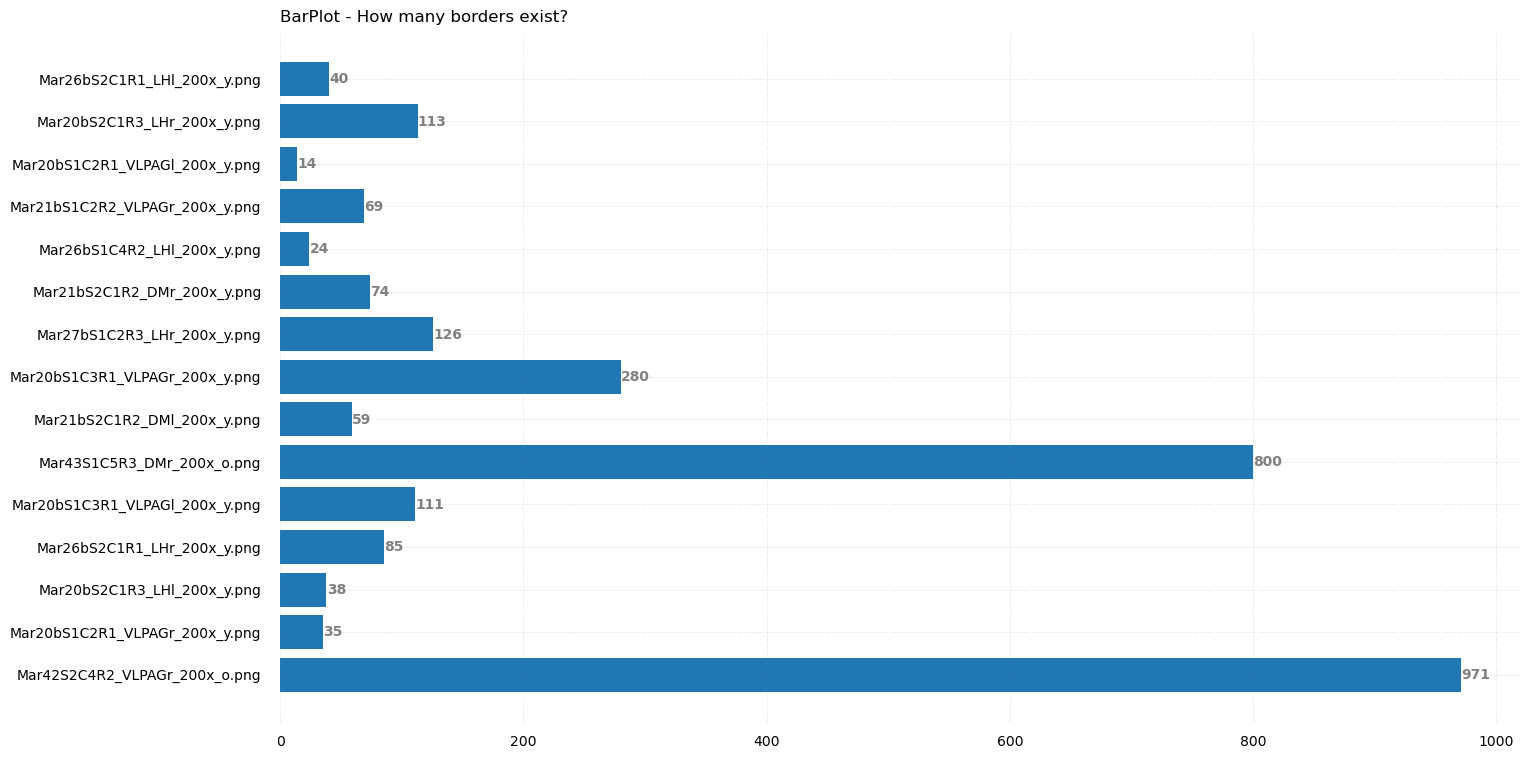

In [13]:
# Plotting the bargraph

fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(keys[0:15], values[0:15])

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
ax.set_title('BarPlot - How many borders exist?',
             loc ='left', )

plt.show()

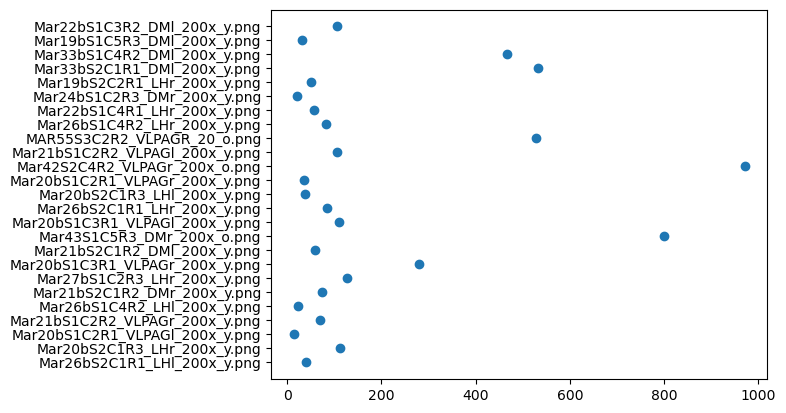

In [14]:
# Plotting the dispersion graph
plt.scatter(values[0:25], keys[0:25])